In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [9]:
#https://www.kaggle.com/tmdb/tmdb-movie-metadata

def get_data():
    # https://www.kaggle.com/tmdb/tmdb-movie-metadata
    credits = pd.read_csv("data/tmdb_5000_credits.csv")
    movies_df = pd.read_csv("data/tmdb_5000_movies.csv")
    return credits, movies_df

### Using Weighted average for each movie's  Average Rating

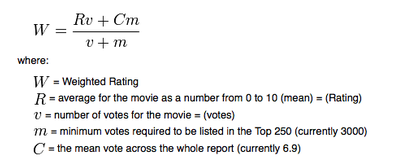


Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page---------------------------

In [20]:

def cleaning_preprocessing_data(credits, movies_df):
    # First rename movie_id to Id
    credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})
    # merge both data using movie_id with id as both id are same in different dataset
    movies_df_merge = movies_df.merge(credits_column_renamed, on='id')
    # movies_df_merge.head()
    # Drop columns which are not useful
    movies_cleaned_df = movies_df_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
    # movies_cleaned_df.head()
    
    # we are going to calculate the weightage using below components
    # Calculate all the components based on the above formula
    v=movies_cleaned_df['vote_count']
    R=movies_cleaned_df['vote_average']
    C=movies_cleaned_df['vote_average'].mean()
    m=movies_cleaned_df['vote_count'].quantile(0.70)
    # Add weighted_average using above formula
    movies_cleaned_df['weighted_average']=((R*v)+ (C*m))/(v+m)
    return movies_cleaned_df
   

In [21]:
# Will check bar plot using weighted_average
def plot_weighted_average(movies_cleaned_df):
    weight_average = movies_cleaned_df.sort_values('weighted_average',ascending=False)
    plt.figure(figsize=(12,6))
    # Title versus weighted_average
    axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
    plt.xlim(4, 10)
    plt.title('Best Movies by average votes', weight='bold')
    plt.xlabel('Weighted Average Score', weight='bold')
    plt.ylabel('Movie Title', weight='bold')
    # plt.savefig('best_movies.png')

In [14]:
def plot_popularity(movies_cleaned_df):
    # sort data using popularity
    popularity=movies_cleaned_df.sort_values('popularity',ascending=False)
    # popularity.head()
    # Will create bar plot using using popularity
    plt.figure(figsize=(12,6))
    # Popularity versus title
    ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

    plt.title('Most Popular by Votes', weight='bold')
    plt.xlabel('Score of Popularity', weight='bold')
    plt.ylabel('Movie Title', weight='bold')
    # plt.savefig('best_popular_movies.png')

In [6]:
### Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)

def recommendation(movies_cleaned_df, n):
    # We will recommedation on the basis of weghted average and popularity
    scaling=MinMaxScaler()
    # Fit data using  both weighted_average and popularity
    movie_scaled_df=scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
    movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
    # movie_normalized_df.head()
    # Adding normalized data of weighted_average and popularity into main dataframe
    movies_cleaned_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df
    # Caculated Score using normalized weight_average and normalized_popularity
    movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
    # sort data using descending order
    movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending=False)
    rank = movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(n)
    return rank
    

In [ ]:
def plot_score()
    # Plot data using score 
    scored_df = movies_cleaned_df.sort_values('score', ascending=False)

    plt.figure(figsize=(16,6))
    # Score versus title
    ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

    #plt.xlim(3.55, 5.25)
    plt.title('Best Rated & Most Popular Blend', weight='bold')
    plt.xlabel('Score', weight='bold')
    plt.ylabel('Movie Title', weight='bold')
    # plt.savefig('scored_movies.png')

In [11]:
# Call all functions
credits, movies_df = get_data()
movies_cleaned_df = cleaning_preprocessing_data(credits, movies_df)
recommedations = recommendation(movies_cleaned_df, 5)
recommedations



,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481


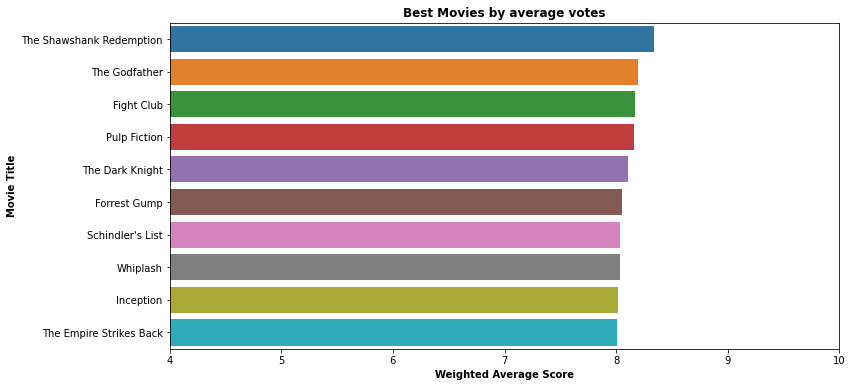

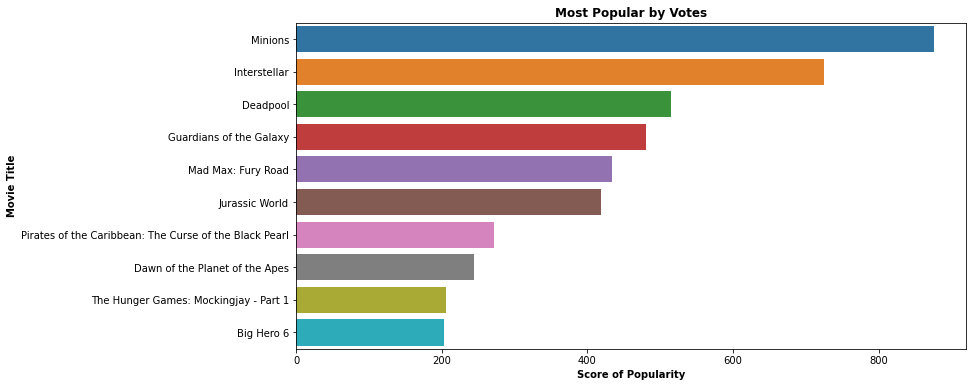

In [15]:
# Plot the graphs
plot_weighted_average(movies_cleaned_df)
plot_popularity(movies_cleaned_df)